In [23]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

# metrics algebra
# Importing everything from above
import sklearn

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
#from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split


# The sklearn library contains a lot of efficient tools for machine learning and statistical modeling
# including classification, regression, clustering and dimensionality reduction
# Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression

# metrics algebra
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from itertools import product                    # some useful functions
#from tqdm import tqdm_notebook



%matplotlib inline

In [24]:
data = pd.read_csv('ExploratoryData.csv', index_col=0,error_bad_lines=False)
data.head()

,GiftCardId,MerchantId,CardCategory,CardType,CardValue,CardCurrentStatus,CardExpiryDate,CustomerId,Breakage,CardStatusDate,CardPurchaseDate,TransactionId,Redeemed,RedemptionDate
index,,,,,,,,,,,,,,
1,GC1,M1,1,1,5000,500,28082019,C1,500,27082020,10122017,T1,4500,12052020
2,GC2,M1,2,2,10000,850,28042020,C2,850,27082020,10122018,T2,9150,12032020
3,GC3,M1,3,3,8000,1100,28082021,C1,0,27082020,10122018,T3,6900,10052020
4,GC4,M2,1,2,9000,1200,28052020,C4,1200,27082020,21042018,T4,7800,12052020
5,GC5,M2,2,3,2000,100,18082021,C4,0,27082020,10122018,T5,1900,11112020


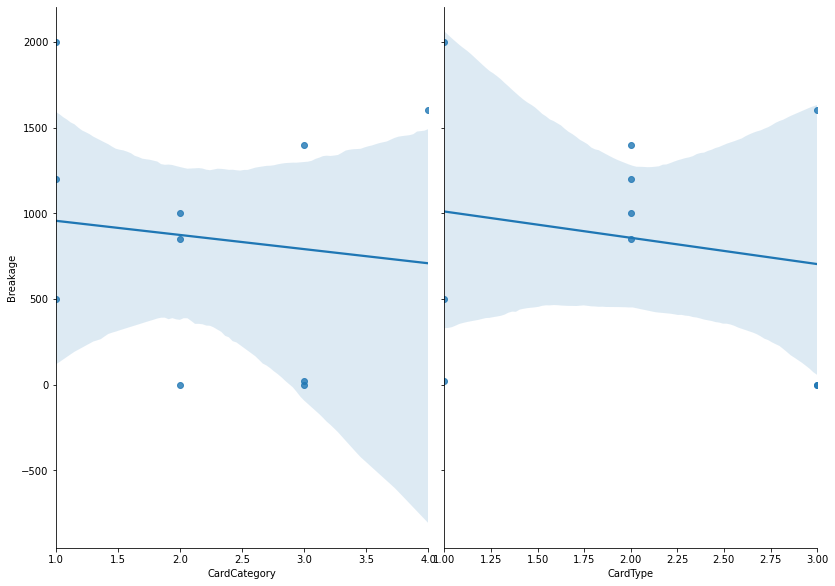

In [25]:
sns.pairplot(data, x_vars=['CardCategory','CardType'], y_vars='Breakage', height=8, aspect=0.7, kind='reg')
# Here adding kind = 'reg' input param in abobe API is drawing Linear Regression line also.
# More distance of a point from line means more error against the point

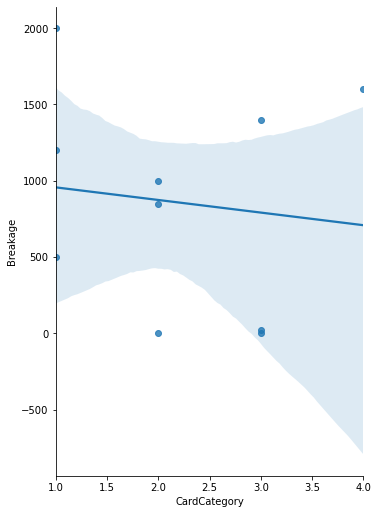

In [26]:
sns.pairplot(data, x_vars=['CardCategory'], y_vars='Breakage', height=7, aspect=0.7, kind='reg')
# Here adding kind = 'reg' input param in abobe API is drawing Linear Regression line also.
# More distance of a point from line means more error against the point

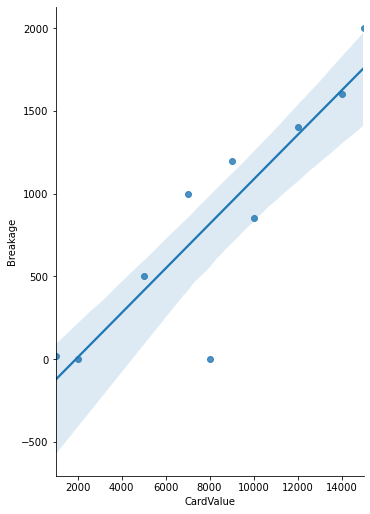

In [27]:
sns.pairplot(data, x_vars=['CardValue'], y_vars='Breakage', height=7, aspect=0.7, kind='reg')
# Here adding kind = 'reg' input param in abobe API is drawing Linear Regression line also.
# More distance of a point from line means more error against the point

In [28]:
### SCIKIT-LEARN ###

# Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:
# y=β0+β1x1+...+βnxn 
# Each  x  represents a different feature, and each feature has its own coefficient. In this case:
# y=β0+β1×TV+β2×Radio+β3×Newspaper

# create X and y , include all three that is TV , Radio and Newspaper on X axis and Sales on Y axis
#feature_cols = ['TV', 'Radio', 'Newspaper'] #0.8972106381789522
#feature_cols = ['TV', 'Radio'] #0.8971942610828957
#feature_cols = ['TV', 'Newspaper'] #0.6458354938293271
#feature_cols = ['Radio', 'Newspaper'] #0.33270518395032256
feature_cols = ['CardType','CardCategory','CardValue'] #0.33270518395032256
                
X = data[feature_cols]
y = data.Breakage

# instantiate and fit
lm2 = LinearRegression()
# Linear Regression with all three features
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

#lm2.score
# print the R-squared value for the model
# X is all data of TV , Y is corresponding sells
lm2.score(X,y)

# Response is providing coefficient of each param. For a given amount of Radio and Newspaper ad spending, 
# an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

202.36436363637984
[-1.86417212e+02 -5.39410909e+01  1.38089212e-01]


0.8559422296744638

In [29]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('CardType', -186.4172121212036),
 ('CardCategory', -53.94109090909233),
 ('CardValue', 0.1380892121212085)]

In [30]:
# exclude Newspaper
# Now exclude one feature that is Newspaper and just keep and repeat the rest of the precess as in above 
X = data[['CardType','CardCategory','CardValue']]
y = data.Breakage

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print the coefficients
list(zip(feature_cols, lm2.coef_))

469.1720353949573


[('CardType', -48.95234493192137),
 ('CardCategory', -37.92990418557742),
 ('CardValue', 0.12828038325768887)]